In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Making a dataframe
bakery_data = pd.read_csv('BreadBasket_DMS.csv', 
                          parse_dates=[['Date', 'Time']]
                         )
bakery_data.head()

,Date_Time,Transaction,Item
0,2016-10-30 09:58:11,1,Bread
1,2016-10-30 10:05:34,2,Scandinavian
2,2016-10-30 10:05:34,2,Scandinavian
3,2016-10-30 10:07:57,3,Hot chocolate
4,2016-10-30 10:07:57,3,Jam


### Initial Experiment ideas 
1. Not putting an item out until a certain time of day
2. Not selling a certain item at all




In [3]:
bakery_data.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [4]:
items = bakery_data.Item.unique()

In [5]:
print(items)

['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry shortbread sandwich'

In [6]:
len(bakery_data.Item.unique())

95

In [7]:
items[0]

'Bread'

In [8]:
counts = {}

for i in range(0,95):
    print('Looking for item ', items[i])
    count = 0
    for item in bakery_data.Item:
        if items[i] == item:
            count = count + 1
    counts[items[i]] = count
    
print(counts)
#type(counts)

Looking for item  Bread
Looking for item  Scandinavian
Looking for item  Hot chocolate
Looking for item  Jam
Looking for item  Cookies
Looking for item  Muffin
Looking for item  Coffee
Looking for item  Pastry
Looking for item  Medialuna
Looking for item  Tea
Looking for item  NONE
Looking for item  Tartine
Looking for item  Basket
Looking for item  Mineral water
Looking for item  Farm House
Looking for item  Fudge
Looking for item  Juice
Looking for item  Ella's Kitchen Pouches
Looking for item  Victorian Sponge
Looking for item  Frittata
Looking for item  Hearty & Seasonal
Looking for item  Soup
Looking for item  Pick and Mix Bowls
Looking for item  Smoothies
Looking for item  Cake
Looking for item  Mighty Protein
Looking for item  Chicken sand
Looking for item  Coke
Looking for item  My-5 Fruit Shoot
Looking for item  Focaccia
Looking for item  Sandwich
Looking for item  Alfajores
Looking for item  Eggs
Looking for item  Brownie
Looking for item  Dulce de Leche
Looking for item  Hon

### We can see that coffee and bread make up the largest number of transactions for all our items sold at the bakery. This is also shown in the histogram below.

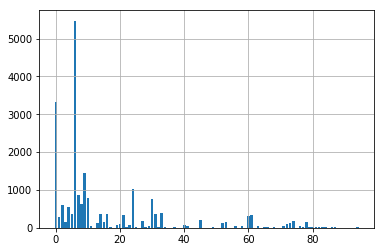

In [9]:
y = counts.values()
x = range(0, len(y))
plt.bar(x, y)
plt.grid(True)

### That's a little crowded, so I'll present fewer variables since our big ticket items hold the most potential for increasing revenue. 

In [10]:
counts2 = {}

for i in range(0,7):
    print('Looking for item ', items[i])
    count2 = 0
    for item in bakery_data.Item:
        if items[i] == item:
            count2 = count2 + 1
    counts2[items[i]] = count2
    
print(counts2)
#type(counts)

Looking for item  Bread
Looking for item  Scandinavian
Looking for item  Hot chocolate
Looking for item  Jam
Looking for item  Cookies
Looking for item  Muffin
Looking for item  Coffee
{'Bread': 3325, 'Scandinavian': 277, 'Hot chocolate': 590, 'Jam': 149, 'Cookies': 540, 'Muffin': 370, 'Coffee': 5471}


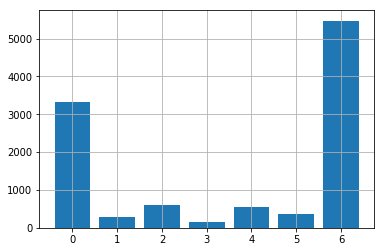

In [11]:
y = counts2.values()
x = range(0, len(y))
plt.bar(x, y)
plt.grid(True)

### Much easier to interpret just how many transactions involve coffee and bread. While both are perishable, bread has a higher cost than coffee to produce, so this is likely our largest area for waste of overproduction. Let’s examine the sales of bread more closely. 

In [12]:
# Creating a new DF with only transactions involving bread
alist = ['Bread']

df = bakery_data[bakery_data['Item'].isin(alist)]

df.head()

,Date_Time,Transaction,Item
0,2016-10-30 09:58:11,1,Bread
9,2016-10-30 10:13:03,5,Bread
18,2016-10-30 10:20:51,8,Bread
19,2016-10-30 10:21:59,9,Bread
23,2016-10-30 10:27:21,11,Bread


In [13]:
# Changing the index to Transaction 
df = df.set_index('Transaction')

df.head()

,Date_Time,Item
Transaction,,
1,2016-10-30 09:58:11,Bread
5,2016-10-30 10:13:03,Bread
8,2016-10-30 10:20:51,Bread
9,2016-10-30 10:21:59,Bread
11,2016-10-30 10:27:21,Bread


In [14]:
# Descriptive statistics for bread sales
df.Date_Time.dt.hour.describe()

count    3325.000000
mean       11.869774
std         2.333803
min         1.000000
25%        10.000000
50%        12.000000
75%        14.000000
max        19.000000
Name: Date_Time, dtype: float64

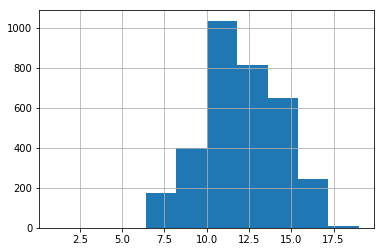

In [15]:
# Making a histogram to show the distribution
# of transaction hours for bread
df.Date_Time.dt.hour.hist()


### We see that there are 3,325 bread sales in our dataset, with a mean transaction hour of 11.8 which is about noon. We also see that the range in sale hour is wide, from 1am to 7pm. Given the distribution of transaction hours being skewed left, we can assume that we have some outliers in the early morning. As such we'll want to remove those. 

### One standard deviation is 2.3 hours, while two would be 4.6 hours. We can probably reduce the hours we sell bread to within 2 standard deviations of our mean sale our and retain most of the business. 95% of bread sales to be precise.

## Hypothesis: 
There will be a difference in revenue related to bread sales for bakeries that sell bread outside the hours of 9:30am - 2pm and bakeries who do not.
## Null: 
There will be no difference in revenue related to bread sales for a bakery that sell bread outside the hours of 9:30am - 2pm and bakeries who do not.
## Experiment: 
At the beginning of the month the bakery will begin tracking how much bread is thrown out each day and will conduct business as normal for 30 days. For the next 30 days the same data will be tracked, but the bakery will limit the availability of bread to between 9:30am and 2pm. At the end of the two months the revenue related to sales of bread for each month will be compared. We will also examine the cost of waste, and factor that into the total revenue. We will test if there is a significant difference in revenue. If we are successful we will see a significant increase in revenue. 
